# NOTES

# IMPORTS

In [6]:
# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np

# Image Preprocessing
import imutils
import cv2

# DEMOSTRATION AND JUNKS

## Variables

In [2]:
image_path = 'C:/users/Tajr/Desktop/iss.jpg'
augmented = 'C:/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Computer Vision/imagelab/nn/conv/dataAugmentationVGGNET/augmented/'
prefix = 'image'
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
total = 0

## Augmentation

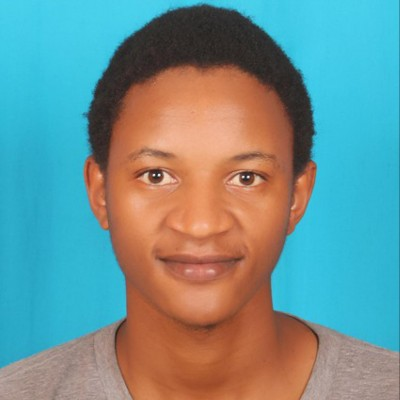

In [3]:
# load image
image = load_img(image_path)
image

In [4]:
# convert image to array and expand dimension
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image.shape

(1, 400, 400, 3)

In [5]:
# data generation
print('[INFO] generating images...')
imageGen = aug.flow(image, batch_size=1, save_to_dir=augmented, save_prefix=prefix, save_format='jpg')

# loop over examples from imageGen generator above
for image in imageGen:
    # increment counter
    total += 1
    
    # terminated over a desired number of images
    if total == 100:
        break
print('[INFO] complete.')

[INFO] generating images...
[INFO] complete.


# DATASET

## Variables

## Preprocessing

In [7]:
class AspectAwarePreprocessor:
    def __init__(self, width, height, inter=cv2.INTER_AREA):
        # store the target image width, height and interpolation method used when resizing
        self.width = width
        self.height = height
        self.inter = inter
    
    def preprocess(self, image):
        # this is a step two algorithm
        # step one determine the shortest dimension and resize along it
        # grab image dimensions and initialize deltas used when cropping image
        (h, w) = image.shape[:2]
        dW = 0
        dH = 0
       
        # resize
        if w < h:
            image = imutils.resize(image, width=self.width, inter=self.inter)
            dH = int((image.shape[0] - self.height) / 2.0)
        else:
            image = imutils.resize(image, height=self.height, inter=self.inter)
            dW = ((image.shape[1] - self.width) / 2.0)
        
        # step two crop the image along the longest dimension to obtain the target width and height
        (h, w) = image.shape[:2]
        image = image[dH:h - dH, dW:w -dW]
        
        # finally, resize the image to the provided spatial dimension to ensure our output image is always a fixed size
        return cv2.resize(image, (self.width, self.height), interpolation=self.inter)

## Data

## Labels

## Spliting

# ARCHITECTURE

# ARCHITECTURE DIAGRAM

# LR SCHEDULING

# COMPILATION

# TRAINING

# PLOTTING

# EVALUATION

# PREDICTION